In [1]:
import json
from pathlib import Path

model = "FSRS-4.5"

users = []
rmse = []
sizes = []
parameters = []
result_dir = Path(f"../result/{model}")
result_files = result_dir.glob("*.json")
for result_file in result_files:
    with open(result_file, "r") as f:
        result = json.load(f)
        users.append(result["user"])
        rmse.append(result[model]["RMSE(bins)"])
        sizes.append(result["size"])
        parameters.append(result["weights"])

In [2]:
import pandas as pd

df = pd.DataFrame({
    "user": users,
    "size": sizes,
    "rmse": rmse,
    "parameters": parameters
})

In [3]:
df[df["size"]>10000].copy().sort_values(by="rmse", ascending=False).head(20)

,user,size,rmse,parameters
2187,15145,11990,0.363854,"[0.0224, 0.8392, 0.8392, 0.8392, 5.9391, 1.886..."
17739,3915,11475,0.302873,"[1.172, 5.0247, 44.6036, 100.0, 5.0204, 1.119,..."
9520,6586,19345,0.290223,"[0.612, 0.738, 1.4889, 5.0658, 5.1655, 0.5313,..."
4791,790,92920,0.288215,"[0.3885, 11.5976, 11.5976, 25.7708, 5.4263, 0...."
12791,5432,34835,0.284732,"[0.0593, 2.1496, 2.1496, 3.8333, 5.5461, 0.576..."
14206,15253,21250,0.282079,"[1.0959, 5.2586, 5.2586, 13.0253, 5.3014, 0.38..."
5143,1487,14360,0.274862,"[0.2574, 0.8305, 1.321, 7.9731, 5.592, 0.8511,..."
19364,13030,13650,0.273977,"[0.4391, 1.6082, 5.3394, 5.3394, 5.2105, 1.227..."
9531,7114,14785,0.273450,"[0.0856, 1.8256, 1.8256, 7.736, 5.2667, 1.4211..."
14686,12056,10460,0.271007,"[2.4718, 2.7078, 3.1046, 9.953, 5.5155, 1.0286..."


In [4]:
width = 2000

def compute_interval(x, interval_length=width):
    return int((x // interval_length + 0.5) * interval_length)

df['group'] = df['size'].apply(compute_interval)

interval_error = df.groupby('group')['rmse'].mean().sort_index().reset_index()

print(interval_error)

       group      rmse
0       1000  0.131761
1       3000  0.090031
2       5000  0.078276
3       7000  0.070158
4       9000  0.066579
..       ...       ...
258  1069000  0.022046
259  1139000  0.036215
260  1341000  0.019846
261  1487000  0.035068
262  1493000  0.019364

[263 rows x 2 columns]


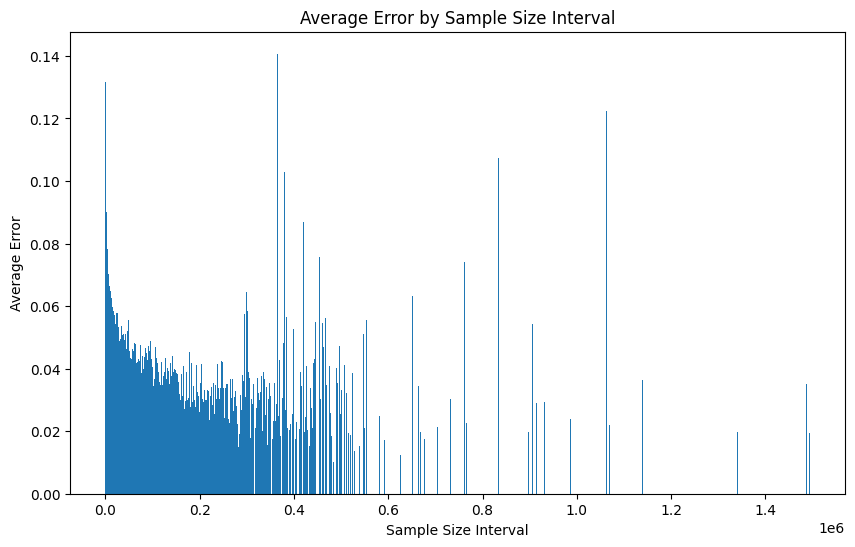

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(interval_error['group'], interval_error['rmse'], width=width)

plt.title('Average Error by Sample Size Interval')
plt.xlabel('Sample Size Interval')
plt.ylabel('Average Error')

plt.show()